## Group Members and Contributions

- __Kenta Asai (A )__
    - a
- __Riley Froehlich (A )__
    - Data Cleaning/Wrangling
- __Aniket Ghatnekar (A14688625)__
    - Data Analysis
    - Visualizations
- __Stephanie Shon (A13811108)__
    - Data Cleaning/Wrangling
    - Data Analysis
- __Haimei Yang (A13519498)__
    - Data Analysis
- __Jeffrey Yao (A )__
    - Data Analysis

## Introduction

 __DATA SCIENCE QUESTION(S) & HYPOTHESIS:__

- Proposed Question
    - How does the frequency of traffic collisions change based on street quality index, traffic volume, and parking meter locations in the city of San Diego?

- Hypothesis
    - We hypothesize that traffic collisions in San Diego will have a higher frequency on streets that have lower OCI’s (Overall Condition Index), higher traffic volume, and will depend on the number of parking meters,  in an area (and thereby, variance of available parking spaces).

We think this topic has ample scope to explore a very important civil and social safety issue. By analysing how traffic collisions vary based on a variety of factors in our own city of San Diego, we plan to find the best way to reduce collisions generally. Although this is a specific analysis in only one city, we hope that highly correlational variables can be recognized with global applicability, at least to some degree.

### Background

Safety is the number one priority when driving. Unfortunately, traffic collisions and rule breaking happen regularly and can range from minor incidents to severe injuries and even death. The number of traffic collisions in San Diego increase every year, and this could potentially affect UCSD students and faculty as many people use cars to commute to and from school. As students of UCSD, we want to find out if San Diego traffic collisions are affected by factors such as street quality, traffic density and the number of parking meters in an effort to gain a better understanding of which areas are most prone to collisions.

There has been a multitude of prior research that has studied the relationship between traffic collisions and different factors such as parking and driver behavior, in an attempt to improve road safety.

For starters, it is important to note that in Miller’s (2016) article, he recognizes that “while pedestrian-related collisions made up a very small share of priority corridor collisions, they comprised over two-thirds (67%) of the fatal collisions on those roadways.” Considering the statistics on the amount of accidents that include pedestrians, there is a big concern that the collisions on the road may affect those who aren’t in a vehicle. This increases the awareness of how deadly these collisions can be, and will continue to be, if there aren’t preventative measures taken for both the pedestrian and driver. In addition, there has been a study by NYU that determined a “71% correlation between risky driving behavior and traffic accidents and concluded that safer driving habits would help to prevent future traffic accidents” (Bousquet, 2017).  The percentage of parking-related midblock accidents increase as the size of streets decrease from a highway to a local street (Jack B. Humphreys & Donald J. Wheeler 1979). Highways do not have parking, but smaller local roads have parking spaces and meters by the sidewalk. 

Although these studies have found that these behaviors seem to play a big factor in road accidents, our team wants to research the cause of collisions from a different perspective. With the pressing issue of the increase in traffic collisions every year, we wanted to find more data on whether the OCI (Overall Condition Index), traffic volume, and the number of parking meters and/or spaces have played a role in the road accidents, in hopes that future preventative measures will be made.

__References:__
- (Humphreys & Wheeler, 1979) : http://onlinepubs.trb.org/Onlinepubs/trr/1979/722/722-004.pdf
- (Miller, 2016): https://datasmart.ash.harvard.edu/news/article/san-jose-tackles-traffic-with-data-802)
- (Bousquet, 2017): https://datasmart.ash.harvard.edu/news/article/can-better-data-make-zero-traffic-deaths-a-reality-1138)

## Data

The following are links to the datasets to be used in this project(as of now, more datasets may be added as needed):

- Traffic Collisions dataset: https://data.sandiego.gov/datasets/police-collisions/
- Street quality datasets:https://data.sandiego.gov/datasets/streets-overall-condition-index/
- Parking meter dataset: https://data.sandiego.gov/datasets/parking-meters-locations/
- Traffic volumes dataset: https://data.sandiego.gov/datasets/traffic-volumes/


The traffic collisions dataset includes all kinds of unlawful acts caught by the local police, such as taking illegal turns, stop requirements, and hit and runs. There are a total of 22,862 observations and with each observation, there is an indicated date, time, street number, street name, street type, violation type, and the number of people injured or killed.

The street quality datasets contains two sets of data measuring the quality of streets in San Diego based on an Overall Condition Index (OCI). One data set is from 2011 and contains 28,098 observations whereas the other data set is from 2015 and contains 30,712 observations. Each observation has an overall condition index, street name, segment length, segment width, the square footage of the segment, what type of street and pavement it is, and a description on whether it is good, fair or poor. 

The parking meter dataset contains the location of parking meters in San Diego. There are a total of 4668 observations and each observation has a zone, an area, a sub-area and the meter’s longitude and latitude. 

The traffic volumes dataset contains the count of vehicles on city streets reported in the form of Average Daily Traffic (ADT). This gives us a good idea of the average traffic volume on each street. There are 11659 observations and each observation has the date the observation was made, the street a segment is on, the cross street limits of a segment, and the counts of cars going north, east, west, and southbound. 

All the datasets cover records over the past couple years, hence giving a large enough combined dataset to work with. We plan to extract the features our project is concerned with, and combine them sensibly into one dataset for ease of analysis.

Cleaning the data will be required as many entries under some columns are not filled. Fortunately, since these are mostly names of streets we do not need them(we will use the street locations and codes instead). We might also find that features such as police beats considerably influence traffic collision frequency during exploratory analysis, and may decide to include features based on degree of correlation.


## Data Cleaning

To start off, import all necessary libraries required for anaylsis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
from IPython.display import display_html
from functools import reduce
from scipy.stats import kde
import plotly.plotly as py
from plotly.graph_objs import *

Now we define a function that lets you see multiple dataframes together.

In [2]:
# method to display all df heads
def multiple_df_display(*arg):
    html_str=''
    for df in arg:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

For the cleaning process, we start by removing all columns in the four major dataframes, which will give no correlation, based on logic and common sense. These columns include numbering systems and id's which do not have any meaning inherently, for the purpose of our analyses. Otherwise, they are features which deviate from our question and hypothesis.

In [4]:
# read in datasets from csv files taken from -   https://data.sandiego.gov/datasets/
df_index = pd.read_csv("oci_2015_datasd.csv")
df_collisions = pd.read_csv("pd_collisions_datasd.csv")
df_traffic = pd.read_csv("traffic_counts_datasd.csv")
df_meters = pd.read_csv("treas_parking_meters_loc_datasd.csv")

# drop OCI columns
df_index.drop( columns = ["seg_id", "seg_length_ft", "street_from", "street_to", "oci_wt", "pvm_class", "func_class"], inplace = True )

# drop collision columns
df_collisions.drop(columns = ["police_beat", "report_id", "cross_st_name", "cross_st_type", "street_dir", "cross_st_dir", "violation_section", "violation_type", "charge_desc", "injured", "killed", "hit_run_lvl"], inplace = True)
# combine street name and street type
df_collisions[ 'street' ] = df_collisions[ 'street_name' ].map( str ) + ' ' + df_collisions[ 'street_type' ]
df_collisions.drop( columns = ["street_name", "street_type"], inplace = True )
df_collisions.dropna( inplace = True )

# drop traffic columns
df_traffic.drop( columns = ["id", "all_count", "northbound_count", "southbound_count", "eastbound_count", "westbound_count", "file_no"], inplace = True )
# new splits data in 'limits' column and puts the two parts into columns named 'limit_1' and 'limit_2'
new = df_traffic[ 'limits' ].str.split( ' - ', n = 1, expand = True) 
df_traffic[ 'limit_1' ] = new[ 0 ]
df_traffic[ 'limit_2' ] = new[ 1 ]
df_traffic.drop( columns = "limits", inplace = True )
# df2 combines like elements in df_traffic
# df2 = df_traffic.groupby( [ 'street_name', 'limit_1', 'limit_2', 'count_date' ], as_index = False).agg({ 'total_count' : 'sum' })
# df_traffic = pd.DataFrame( df2 )
df_traffic.dropna( inplace = True )

# drop parking meter columns
df_meters.drop( columns = ["area", "pole", "config_id", "config_name"], inplace = True )
df_meters.dropna( inplace = True )

multiple_df_display(df_index[0:5], df_collisions[0:5], df_traffic[0:5], df_meters[0:5])

30712


oci 
 street 
 seg_width_ft 
 area_sq_ft 
 oci_desc 
 
 
 
 
 0 
 65.14 
 ALLEY 
 30.0 
 23181.774 
 Fair 
 
 
 1 
 67.45 
 ALLEY 
 30.0 
 5880.075 
 Fair 
 
 
 2 
 70.88 
 ALLEY 
 30.0 
 11850.147 
 Good 
 
 
 3 
 84.00 
 ALLEY 
 30.0 
 5760.075 
 Good 
 
 
 4 
 79.24 
 ALLEY 
 30.0 
 7552.620 
 Good 
 
 
 
 
 
 
 date_time 
 street_no 
 street 
 
 
 
 
 0 
 2017-01-01 00:01:00 
 8300 
 CAM DEL ORO 
 
 
 1 
 2017-01-01 00:01:00 
 6400 
 CRAWFORD STREET 
 
 
 2 
 2017-01-01 00:01:00 
 8100 
 ROYAL GORGE DRIVE 
 
 
 3 
 2017-01-01 00:01:00 
 5500 
 VALERIO TRAIL 
 
 
 4 
 2017-01-01 01:00:00 
 1000 
 11TH AVENUE 
 
 
 
 
 
 
 street_name 
 total_count 
 count_date 
 limit_1 
 limit_2 
 
 
 
 
 0 
 01 AV 
 18010 
 2007-03-13 00:00:00 
 A ST 
 ASH ST 
 
 
 1 
 01 AV 
 20060 
 2010-03-18 00:00:00 
 A ST 
 ASH ST 
 
 
 2 
 01 AV 
 19597 
 2013-03-12 00:00:00 
 A ST 
 ASH ST 
 
 
 3 
 01 AV 
 2298 
 2012-12-11 00:00:00 
 ASH ST 
 BEECH ST 
 
 
 4 
 01 AV 
 15625 
 2011-09-01 00:00:00 
 B ST 
 A ST 
 
 
 
 
 
 
 zone 
 sub_area 
 longitude 
 latitude 
 
 
 
 
 0 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145178 
 32.700353 
 
 
 1 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145178 
 32.700352 
 
 
 2 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145349 
 32.700155 
 
 
 3 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145405 
 32.700107 
 
 
 4 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145539 
 32.699987

The second step is to create a standardization for all datasets and then combine the oci dataset and the collisions dataset for our first analysis.

In [5]:
# initializing dictionary of collisions and street names
num_collisions = {}

# converting street types to standard short forms used in maps
conversion = {"STREET" : "ST", "AVENUE": "AV", "CIRCLE": "CR", "WAY":" WY", "ROAD": "RD", 
              "COURT" : "CT", "DRIVE" : "DR", "LANE": "LN", "PLACE": "PL", }

# loop through collisions dataframe
for index, row in df_collisions.iterrows():
    # split the street type from name
    street_type = str(row['street']).split(' ')[-1]
    
    # convert the street-type to short-hand
    if conversion.get(street_type) != None:
        street_type = conversion[street_type]
    # re-attach the street type to the name
    street_name = ' '.join(str(row['street']).split(' ')[0:-1]) + " " + street_type
    # add new streets to dictionary and add to old ones
    if num_collisions.get(street_name) == None:
        num_collisions[street_name] = 0;
    num_collisions[street_name]+=1;

# creating new column in df_index
df_index['collisions'] = 0

# filling the collisions column
for index, row in df_index.iterrows():
    street = str(row['street'])
    if num_collisions.get(street) != None:
        df_index.loc[index, 'collisions'] = num_collisions[street]

# ignore empty collisions because df_index.size > num_collisions.size
df_index_collisions = df_index[df_index.collisions != 0]

df_index_collisions

oci           street  seg_width_ft  area_sq_ft oci_desc  collisions
2053   79.300          44TH ST          20.0   11322.960     Good          20
2055   78.500          01ST AV          30.0    7295.655     Good          85
2056   84.978          01ST AV          40.0   14080.000     Good          85
...       ...              ...           ...         ...      ...         ...
30684  83.742  ALPINE RIDGE RD          34.0   28050.000     Good           1
30707  89.500   COYOTE BUSH DR          30.0    2370.000     Good           1
30711  80.828         CANON ST          17.0    7351.480     Good          13

[13755 rows x 6 columns]

Separate collisions dataset into 2 years for descriptive analysis (2019 not taken because complete year data is not available as of yet). For these 2 subsets we only care about counts, as that is all we will use for descreptive analysis.

In [7]:
collisions_2017 = df_collisions[df_collisions['date_time'].str.contains("2017")]
collisions_2018 = df_collisions[df_collisions['date_time'].str.contains("2018")]
collisions_2017.drop(columns = 'street_no',inplace=True)
collisions_2018.drop(columns = 'street_no',inplace=True)
collisions_2017.rename(columns = {'date_time':'Collision Counts (2017)'}, inplace=True)
collisions_2018.rename(columns = {'date_time':'Collision Counts (2018)'}, inplace=True)

## Descriptive Analysis

We first take a look at the OCI dataset (2015)

In [15]:
oci_mean = df_index_collisions['oci'].mean()
oci_std = df_index_collisions['oci'].std()
oci_max = df_index_collisions['oci'].max()
oci_min = df_index_collisions['oci'].min()

print("Mean oci of streets with at least one collision: " + format(oci_mean, '.3f'))
print("Standard Deviation of oci of street with at least one collision: " + format(oci_std, '.3f'))
print("Max oci of streets with at least one collision: " + format(oci_max, '.3f'))
print("Min oci of streets with at least one collision: " + format(oci_min, '.3f') + "\n")

Mean oci of streets with at least one collision: 69.783
Standard Deviation of oci of street with at least one collision: 18.265
Max oci of streets with at least one collision: 100.000
Min oci of streets with at least one collision: 0.000



To perform descriptive analysis, we must understand the shape of the data. We now take a look at collisions data.
Note: Only heads of dataframes shown.

2017 subset shape:
(10238, 2)
2018 subset shape:
(9897, 2)


/Users/aniket/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



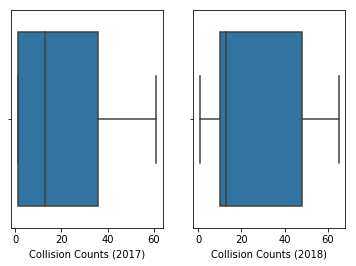

In [16]:
# get shape of two subsets
print("2017 subset shape:")
print(collisions_2017.shape)
print("2018 subset shape:")
print(collisions_2018.shape)

# group by streets
counts_2017 = collisions_2017.groupby(['street'], as_index = False).count()[0:9]
counts_2018 = collisions_2018.groupby(['street'], as_index = False).count()[0:9]

# Plot
fig, ax = plt.subplots(1,2)
sns.boxplot('Collision Counts (2017)', data = counts_2017, ax = ax[0])
sns.boxplot('Collision Counts (2018)', data = counts_2018, ax = ax[1])

fig.show()

In [ ]:
Updating(need to convert to a single year)

In [ ]:
# Analytic analysis for collisions and traffic volume
average_traffic_count = {}
street_names = []
total_count = []

# loop through df_traffic and obtain average traffic count per street

for index, row in df_traffic.iterrows():
    street = str(row['street_name'])
    traffic_count = row['total_count']
    if street not in average_traffic_count:
        average_traffic_count[street] = (traffic_count, 1)
    else:
        street_count = average_traffic_count[street][1] + 1
        average_traffic_count[street] = (traffic_count, street_count)


for street in average_traffic_count:
    street_names.append(street)

for street, street_count in average_traffic_count.items():
    total_count.append(street_count[0]/street_count[1])

data = {'street_name' : street_names, 'average_total_count' : total_count}    
df_traffic_collisions = pd.DataFrame(data)

# adding a new row to df_traffic_collisions
df_traffic_collisions['collisions'] = 0

for index, row in df_traffic_collisions.iterrows():
    street = str(row['street_name'])
    if street in num_collisions:
        df_traffic_collisions.loc[index, 'collisions'] = num_collisions[street]
        
df_traffic_collisions = df_traffic_collisions[df_traffic_collisions.collisions != 0]

df_traffic_collisions